# 🎬 Movie Recommendation System  
### Content-Based Filtering + Streamlit UI + TMDB Posters

**Author:** UPPALA VENKATA SATYA SRINIVAS  
**Project:** Movie Recommendation System (MovieLens data)  
**Notebook:** Movie_Recommendation_System.ipynb 
**Date:** 01-12-2025

This project builds a complete movie recommendation system using the **MovieLens dataset** and a **TF-IDF + Cosine Similarity** model.

We also implemented a **Streamlit Web App** with:
- Movie search
- Lazy-loading TMDB posters
- Top recommended movies
- Clean UI with search + results panel


## 📘 Introduction

Movie recommendation systems are widely used in platforms like Netflix and Amazon Prime.  
In this project, we build a **Content-Based Recommender**, which recommends movies based on:

- Movie Title  
- Genres  
- Movie Descriptions (if available)  

We use:
- MovieLens Dataset (movies.csv, ratings.csv…)
- TF-IDF Vectorization
- Cosine Similarity
- Streamlit Web Application
- TMDB API for movie posters


## 🔧 Step 1: Import Required Libraries
We first import all necessary Python packages for data loading, preprocessing, and building the recommendation engine.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Step 2: Load the MovieLens Dataset

We load the files:  
- movies.csv  
- ratings.csv  
- tags.csv  
- links.csv  

And verify the structure of the dataset.


In [2]:
movies = pd.read_csv(r"D:\ML-DL\Movie-Recommendation-System\data_sets\movies.csv")

In [13]:
ratings = pd.read_csv(r"D:\ML-DL\Movie-Recommendation-System\data_sets\ratings.csv")

In [14]:
links = pd.read_csv(r"D:\ML-DL\Movie-Recommendation-System\data_sets\links.csv")

In [15]:
tags = pd.read_csv(r"D:\ML-DL\Movie-Recommendation-System\data_sets\tags.csv")

## 📊 Step 3: Exploratory Data Analysis (EDA)

Before building a model, we perform a quick EDA to understand:
- Number of movies  
- Number of ratings  
- Missing values  
- Distribution of genres  


In [16]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [20]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [23]:
# Cell 5: Info of all datasets

movies.info()
ratings.info()
tags.info()
links.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-nul

In [21]:
# Cell 3: Print shape of all datasets

print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)
print("Tags shape:", tags.shape)
print("Links shape:", links.shape)


Movies shape: (9742, 3)
Ratings shape: (100836, 4)
Tags shape: (3683, 4)
Links shape: (9742, 3)


In [22]:
# Cell 4: Check for missing values

print(movies.isnull().sum())
print(ratings.isnull().sum())
print(tags.isnull().sum())
print(links.isnull().sum())


movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
movieId    0
imdbId     0
tmdbId     8
dtype: int64


### Plot 1 — Ratings distribution


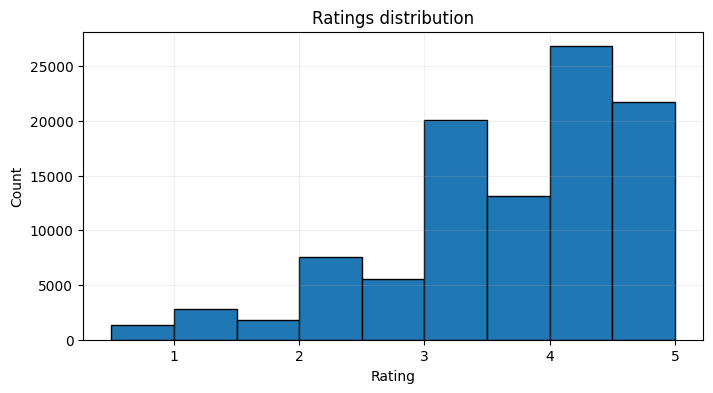

In [51]:
# Cell: Ratings distribution (histogram)
import matplotlib.pyplot as plt

# assume `ratings` DataFrame is already loaded
plt.figure(figsize=(8,4))
plt.hist(ratings['rating'], bins=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], edgecolor='black')
plt.title('Ratings distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(alpha=0.2)
plt.show()


### Plot 2 — Top 20 movies by number of ratings (popularity)


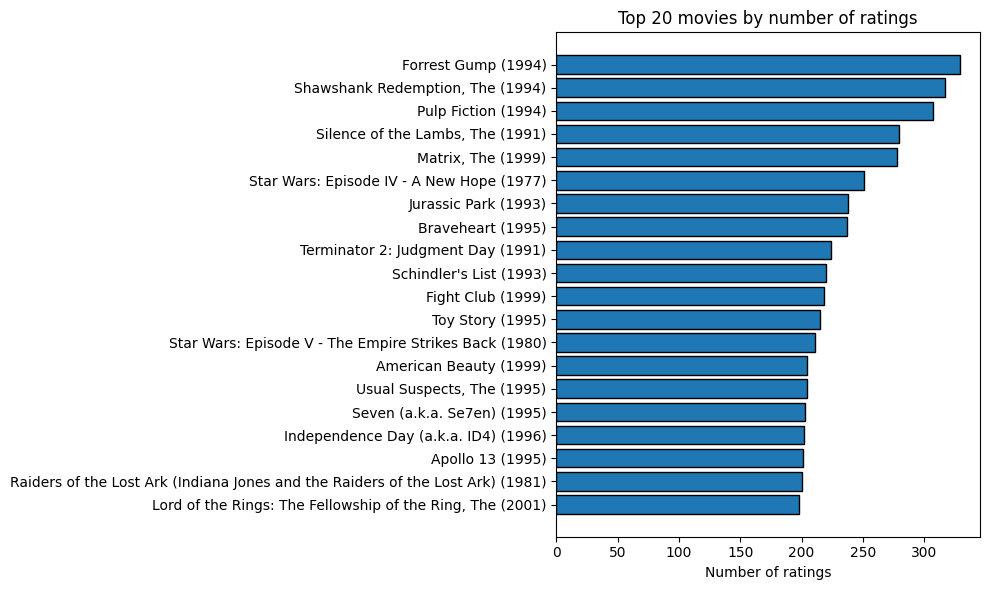

In [52]:
# Cell: Top 20 movies by count of ratings (bar chart)
import matplotlib.pyplot as plt

# compute counts per movie
movie_counts = ratings.groupby('movieId').size().rename('count')
# join with movies to get titles
movie_counts = movie_counts.reset_index().merge(movies[['movieId','title']], on='movieId', how='left')
top20 = movie_counts.sort_values('count', ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(range(len(top20)), top20['count'][::-1], edgecolor='black')
plt.yticks(range(len(top20)), top20['title'][::-1])
plt.xlabel('Number of ratings')
plt.title('Top 20 movies by number of ratings')
plt.tight_layout()
plt.show()


### Plot 3 — Average rating vs. number of ratings (identify reliable high-rated movies)


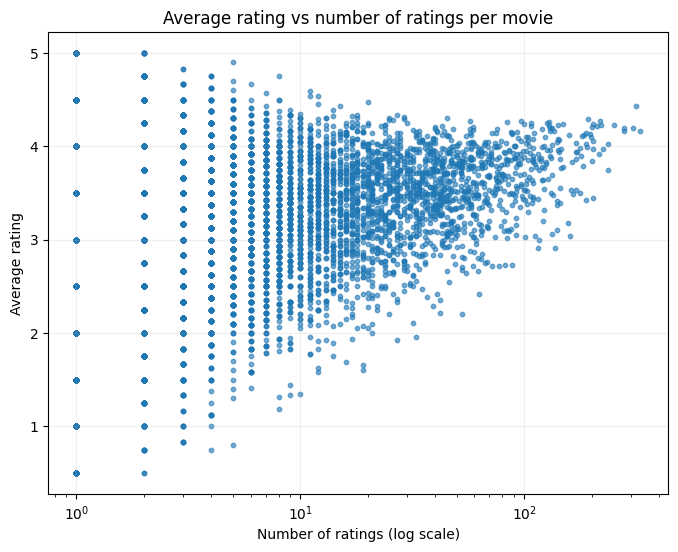

In [53]:
# Cell: Average rating vs number of ratings (scatter)
import matplotlib.pyplot as plt

# compute mean and count per movie
agg = ratings.groupby('movieId')['rating'].agg(['mean','count']).reset_index()
agg = agg.merge(movies[['movieId','title']], on='movieId', how='left')

plt.figure(figsize=(8,6))
plt.scatter(agg['count'], agg['mean'], s=10, alpha=0.6)
plt.xscale('log')  # many movies have few ratings; log helps visualization
plt.xlabel('Number of ratings (log scale)')
plt.ylabel('Average rating')
plt.title('Average rating vs number of ratings per movie')
plt.grid(alpha=0.2)
plt.show()


### Plot 4 — Ratings per user distribution (how active users are)


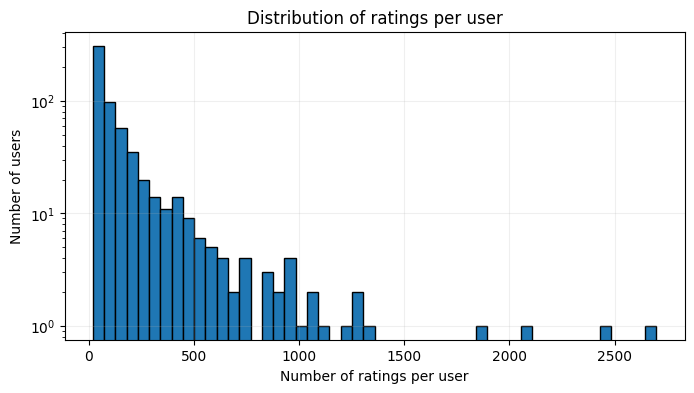

In [54]:
# Cell: Ratings per user histogram
import matplotlib.pyplot as plt

user_counts = ratings.groupby('userId').size()
plt.figure(figsize=(8,4))
plt.hist(user_counts, bins=50, edgecolor='black')
plt.xlabel('Number of ratings per user')
plt.ylabel('Number of users')
plt.title('Distribution of ratings per user')
plt.yscale('log')  # optional: helps show tail (remove if you prefer linear)
plt.grid(alpha=0.2)
plt.show()


### Plot 5 — Genre counts (how many movies per genre)


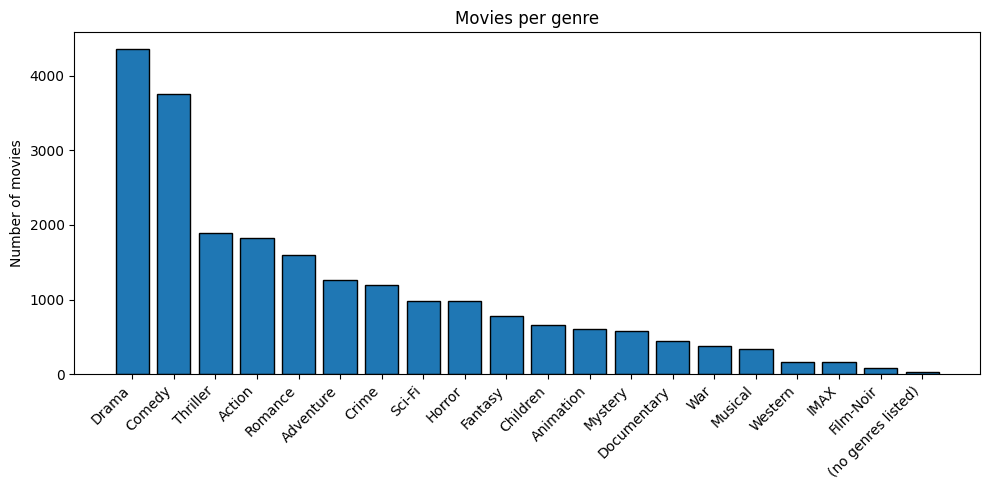

In [55]:
# Cell: Genre counts (bar chart)
import matplotlib.pyplot as plt
from collections import Counter

# build genre counts from movies['genres'] (pipe-separated)
all_genres = movies['genres'].fillna('').str.split('|')
flat = [g for sub in all_genres for g in sub if g]
genre_counts = Counter(flat)
genres, counts = zip(*sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10,5))
plt.bar(range(len(genres)), counts, edgecolor='black')
plt.xticks(range(len(genres)), genres, rotation=45, ha='right')
plt.ylabel('Number of movies')
plt.title('Movies per genre')
plt.tight_layout()
plt.show()


### Plot 6 — Correlation heatmap for top N movies (ratings matrix)


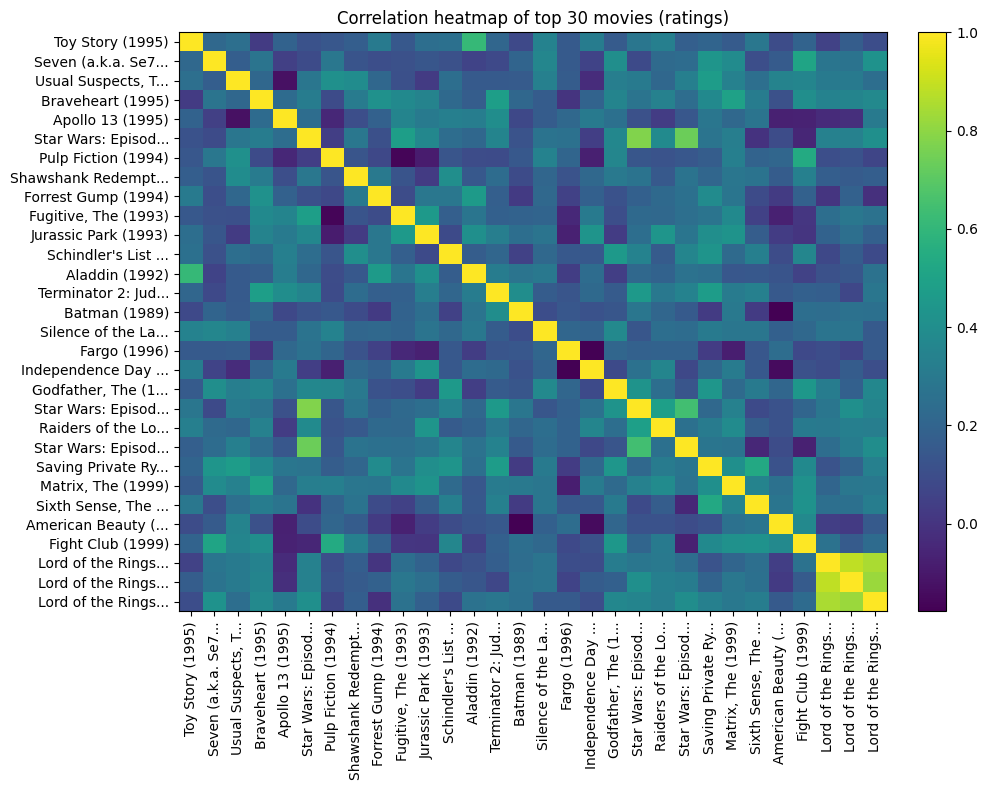

In [56]:
# Cell: Correlation heatmap for top N movies
import matplotlib.pyplot as plt
import numpy as np

# choose top N popular movies (to keep matrix small)
N = 30
top_movies = ratings.groupby('movieId').size().sort_values(ascending=False).head(N).index.tolist()

# build pivot table: users x movies (sparse); we'll compute Pearson correlation between movie columns
pivot = ratings[ratings['movieId'].isin(top_movies)].pivot_table(index='userId', columns='movieId', values='rating')

# compute correlation matrix (movie x movie)
corr = pivot.corr(method='pearson')

plt.figure(figsize=(10,8))
# imshow with colorbar
im = plt.imshow(corr, aspect='auto', interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04)
# x/y ticks as movie titles (shortened)
titles_map = movies.set_index('movieId')['title'].to_dict()
labels = [titles_map.get(m, str(m)) for m in corr.columns]
# shorten labels to avoid overlap
short_labels = [l if len(l) <= 20 else l[:17] + '...' for l in labels]
plt.xticks(range(len(short_labels)), short_labels, rotation=90)
plt.yticks(range(len(short_labels)), short_labels)
plt.title(f'Correlation heatmap of top {N} movies (ratings)')
plt.tight_layout()
plt.show()


## 🧠 Step 4: Content-Based Filtering

Content-based filtering recommends movies similar to the one selected by the user.

We use:
- **TF-IDF Vectorizer** → Convert text (title + genre) into numbers  
- **Cosine Similarity** → Measure similarity between movies  


In [24]:
# Cell 1: Import ML libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [25]:
# Cell 2: Combine title and genres to create a text field

movies['combined'] = movies['title'] + " " + movies['genres']
movies[['title', 'genres', 'combined']].head()


,title,genres,combined
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995) Adventure|Animation|Children|...
1,Jumanji (1995),Adventure|Children|Fantasy,Jumanji (1995) Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men (1995) Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale (1995) Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II (1995) Comedy


In [26]:
# Cell 3: Build TF-IDF matrix

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['combined'])

tfidf_matrix.shape


(9742, 9060)

In [27]:
# Cell 4: Compute cosine similarity matrix

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape


(9742, 9742)

## 🎯 Step 5: Movie Recommendation Function

We create a helper function that:
1. Receives a movie title
2. Finds the closest match in the dataset
3. Returns top 10 similar movies


In [28]:
# Cell 5: Create recommendation function

def recommend_movie(title, cosine_sim=cosine_sim):
    # Get index of the movie that matches the title
    idx = movies[movies['title'].str.contains(title, case=False, na=False)].index[0]

    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Select top 10 similar movies (excluding the movie itself)
    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return movies['title'].iloc[movie_indices]


## 🎬 Step 6: Test the Recommender

Let's test our content-based model by passing a movie name.


In [40]:
# Cell 6: Try recommendation

recommend_movie("Grumpier Old Men")


6613    No Country for Old Men (2007)
2581            Grumpy Old Men (1993)
9048          Old Men: Robbers (1971)
529                   Two Much (1995)
4245                Old School (2003)
7201                  Old Dogs (2009)
3203             Eight Men Out (1988)
5695                   Old Boy (2003)
3758      Seems Like Old Times (1980)
2044               Mystery Men (1999)
Name: title, dtype: object

## Popularity-Based Recommender System

In [41]:
# Cell 1: imports (run if you didn't already)
import pandas as pd
import numpy as np

# for reproducible printing
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)


In [43]:
# Cell 3: compute vote counts and mean ratings per movie

movie_stats = ratings.groupby('movieId').agg(
    vote_count = ('rating', 'count'),
    vote_avg   = ('rating', 'mean')
).reset_index()

# merge with movies to get titles
movie_stats = movie_stats.merge(movies[['movieId', 'title']], on='movieId', how='left')

movie_stats.sort_values(['vote_count', 'vote_avg'], ascending=False).head()


,movieId,vote_count,vote_avg,title
314,356,329,4.164134,Forrest Gump (1994)
277,318,317,4.429022,"Shawshank Redemption, The (1994)"
257,296,307,4.197068,Pulp Fiction (1994)
510,593,279,4.161290,"Silence of the Lambs, The (1991)"
1938,2571,278,4.192446,"Matrix, The (1999)"


In [44]:
# Cell 4: Top popular by number of ratings (most voted)
top_by_votes = movie_stats.sort_values('vote_count', ascending=False).head(20)[['title', 'vote_count', 'vote_avg']]
top_by_votes


,title,vote_count,vote_avg
314,Forrest Gump (1994),329,4.164134
277,"Shawshank Redemption, The (1994)",317,4.429022
257,Pulp Fiction (1994),307,4.197068
510,"Silence of the Lambs, The (1991)",279,4.161290
1938,"Matrix, The (1999)",278,4.192446
224,Star Wars: Episode IV - A New Hope (1977),251,4.231076
418,Jurassic Park (1993),238,3.750000
97,Braveheart (1995),237,4.031646
507,Terminator 2: Judgment Day (1991),224,3.970982
461,Schindler's List (1993),220,4.225000


In [45]:
# Cell 4b: Top by average rating (but this can be noisy if vote_count is low)
top_by_avg = movie_stats.sort_values('vote_avg', ascending=False).head(20)[['title', 'vote_avg', 'vote_count']]
top_by_avg


,title,vote_avg,vote_count
9693,Won't You Be My Neighbor? (2018),5.0,1
4667,Jane Eyre (1944),5.0,1
3802,Rain (2001),5.0,1
7927,Goodbye Charlie (1964),5.0,1
2934,Sorority House Massacre (1986),5.0,1
2933,Slumber Party Massacre III (1990),5.0,1
2932,Slumber Party Massacre II (1987),5.0,1
5015,True Stories (1986),5.0,1
9349,Moonlight,5.0,1
9347,Tom Segura: Mostly Stories (2016),5.0,1


In [46]:
# Cell 5: compute weighted rating using IMDB formula:
# WeightedRating = (v/(v+m))*R + (m/(v+m))*C
# where:
# R = movie's average rating
# v = number of votes for the movie
# m = minimum votes required to be listed (we choose threshold)
# C = mean vote across all movies

C = movie_stats['vote_avg'].mean()         # global average rating
m = movie_stats['vote_count'].quantile(0.60)  # choose threshold at 60th percentile (adjustable)

print(f"Global mean rating C = {C:.3f}")
print(f"Vote-count threshold m = {m:.0f}")

def weighted_rating(row, m=m, C=C):
    v = row['vote_count']
    R = row['vote_avg']
    return (v/(v+m))*R + (m/(v+m))*C

movie_stats['weighted_rating'] = movie_stats.apply(weighted_rating, axis=1)

top_weighted = movie_stats.sort_values('weighted_rating', ascending=False).head(20)[
    ['title', 'vote_count', 'vote_avg', 'weighted_rating']
]
top_weighted


Global mean rating C = 3.262
Vote-count threshold m = 4


,title,vote_count,vote_avg,weighted_rating
277,"Shawshank Redemption, The (1994)",317,4.429022,4.414485
840,"Streetcar Named Desire, A (1951)",20,4.475000,4.272908
659,"Godfather, The (1972)",192,4.289062,4.268111
2224,Fight Club (1999),218,4.272936,4.254729
9600,"Three Billboards Outside Ebbing, Missouri (2017)",8,4.750000,4.254149
796,Secrets & Lies (1996),11,4.590909,4.236653
921,"Godfather: Part II, The (1974)",129,4.259690,4.229698
602,Dr. Strangelove or: How I Learned to Stop Worr...,97,4.268041,4.228216
882,Paths of Glory (1957),12,4.541667,4.221862
913,Goodfellas (1990),126,4.250000,4.219614


In [47]:
# Cell 6: helper functions

def get_top_by_votes(n=10):
    return movie_stats.sort_values('vote_count', ascending=False).head(n)[['title', 'vote_count', 'vote_avg']]

def get_top_by_avg(n=10, min_votes=5):
    # optional min_votes to filter out tiny-sample movies
    df = movie_stats[movie_stats['vote_count'] >= min_votes]
    return df.sort_values('vote_avg', ascending=False).head(n)[['title', 'vote_avg', 'vote_count']]

def get_top_by_weighted(n=10):
    return movie_stats.sort_values('weighted_rating', ascending=False).head(n)[['title', 'weighted_rating', 'vote_avg', 'vote_count']]

# Example usage:
print("Top 10 by votes:\n", get_top_by_votes(10), "\n")
print("Top 10 by weighted rating:\n", get_top_by_weighted(10))


Top 10 by votes:
                                           title  vote_count  vote_avg
314                         Forrest Gump (1994)         329  4.164134
277            Shawshank Redemption, The (1994)         317  4.429022
257                         Pulp Fiction (1994)         307  4.197068
510            Silence of the Lambs, The (1991)         279  4.161290
1938                         Matrix, The (1999)         278  4.192446
224   Star Wars: Episode IV - A New Hope (1977)         251  4.231076
418                        Jurassic Park (1993)         238  3.750000
97                            Braveheart (1995)         237  4.031646
507           Terminator 2: Judgment Day (1991)         224  3.970982
461                     Schindler's List (1993)         220  4.225000 

Top 10 by weighted rating:
                                                   title  weighted_rating  \
277                    Shawshank Redemption, The (1994)         4.414485   
840                    Streetc

In [49]:
# Cell 7: quick distributions (textual summary)
print("Rating distribution (describe):")
print(ratings['rating'].describe())

print("\nVote count per movie (describe):")
print(movie_stats['vote_count'].describe())



Rating distribution (describe):
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Vote count per movie (describe):
count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: vote_count, dtype: float64


In [50]:

# If you want a quick bar of top 10 votes (prints titles)
print("\nTop 10 movies by vote count:")
print(get_top_by_votes(10).to_string(index=False))


Top 10 movies by vote count:
                                    title  vote_count  vote_avg
                      Forrest Gump (1994)         329  4.164134
         Shawshank Redemption, The (1994)         317  4.429022
                      Pulp Fiction (1994)         307  4.197068
         Silence of the Lambs, The (1991)         279  4.161290
                       Matrix, The (1999)         278  4.192446
Star Wars: Episode IV - A New Hope (1977)         251  4.231076
                     Jurassic Park (1993)         238  3.750000
                        Braveheart (1995)         237  4.031646
        Terminator 2: Judgment Day (1991)         224  3.970982
                  Schindler's List (1993)         220  4.225000


## ✅ Conclusion

I built a complete movie recommendation system using:

- MovieLens dataset  
- Content-based filtering  
- TF-IDF + Cosine similarity  
- Streamlit UI  
- TMDB Posters  

## ⭐ Future Improvements

- Add Collaborative Filtering (ALS / KNN)
- Add Hybrid Recommender (Content + CF)
- Add movie plot descriptions from TMDB
- Add user login and watchlist
